In [2]:
#%matplotlib notebook
%matplotlib inline

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 9)

import scipy
import scipy.stats
import math
import numpy as np
import pandas as pd

#import ipywidgets
#from ipywidgets import interact

## Return Delay Time @57600 bps

Measured time (with an oscilloscope) between the end of the last bit of the *Instruction Packet* and the beginning of the first bit of the *Status Packet* with respect to the *Return Delay Time* value set within the tested Dynamixel (address 0x05 in the internal *Control Table*).

### Raspberry Pi using GPIO

In [40]:
rdt_dict = {
    50:  [184, 184, 184, 184, 279, 184, 198, 279, 192, 326],
    100: [345, 501, 350, 350, 492, 350, 350, 496, 495, 350],
    150: [501, 648, 648, 648, 501, 648, 648, 648, 501, 567],
    200: [800, 800, 800, 800, 690, 800, 800, 800, 660, 800],
    250: [960, 960, 960, 960, 960, 960, 837, 856, 955, 955]
}

df_gpio = pd.DataFrame(rdt_dict)

### Raspberry Pi using USB2Dynamixel

In [42]:
rdt_dict = {
    50:  [190, 190, 185, 187, 246, 190, 190, 190, 190, 332],
    100: [480, 492, 492, 346, 346, 346, 495, 450, 487, 421],
    150: [510, 650, 650, 506, 645, 496, 496, 645, 525, 503],
    200: [800, 660, 660, 800, 800, 800, 800, 742, 800, 800],
    250: [965, 955, 955, 965, 816, 965, 965, 955, 955, 965]
}

df_usb2dynamixel = pd.DataFrame(rdt_dict)

### Plots

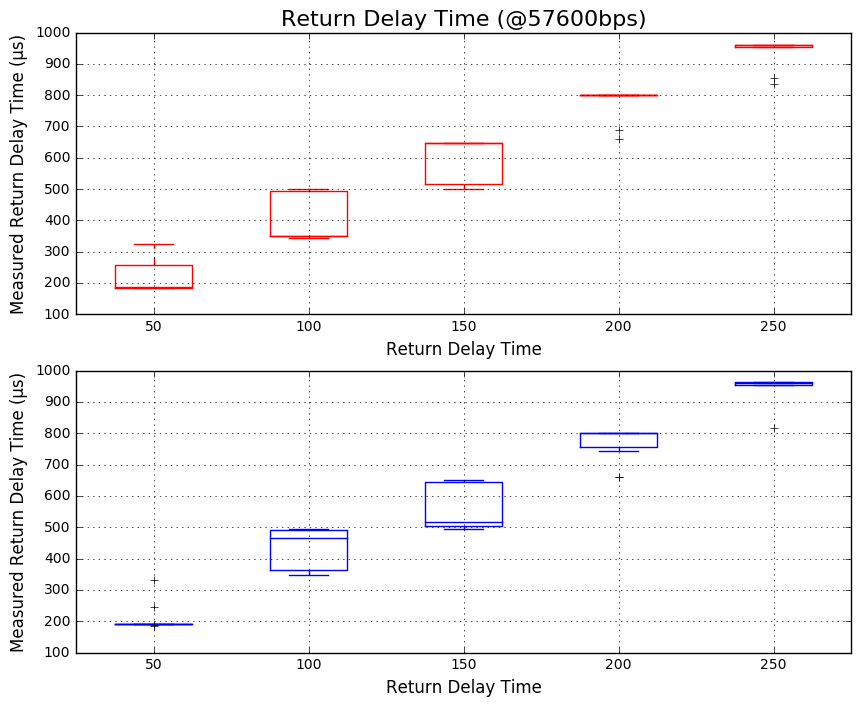

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

df_gpio.plot(ax=ax1,
             kind="box",
             color="r",
             legend=True,
             label="GPIO")

df_usb2dynamixel.plot(ax=ax2,
                      kind="box",
                      color="b",
                      legend=True,
                      label="USB2Dynamixel");

ax1.grid(True)
ax2.grid(True)

ax1.set_xlabel("Return Delay Time", fontsize=12)
ax1.set_ylabel("Measured Return Delay Time (µs)", fontsize=12)

ax2.set_xlabel("Return Delay Time", fontsize=12)
ax2.set_ylabel("Measured Return Delay Time (µs)", fontsize=12)

ax1.set_title("Return Delay Time (@57600bps)", fontsize=16)

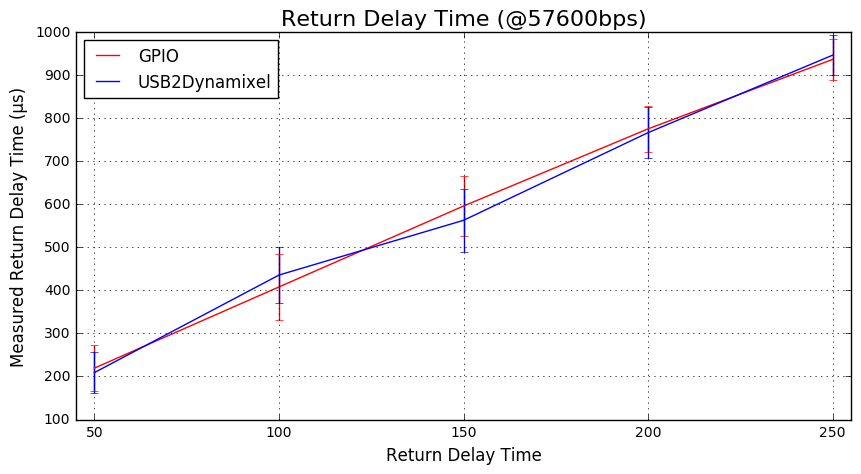

In [116]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

df_gpio.mean().plot(ax=ax1,
                    yerr=df_gpio.std(),
                    legend=True,
                    label="GPIO",
                    color="r",
                    linewidth=1)

df_usb2dynamixel.mean().plot(ax=ax1,
                             yerr=df_usb2dynamixel.std(),
                             legend=True,
                             label="USB2Dynamixel",
                             color="b",
                             linewidth=1);

ax1.set_xlim(left=45, right=255)

ax1.grid(True)

ax1.set_xlabel("Return Delay Time", fontsize=12)
ax1.set_ylabel("Measured Return Delay Time (µs)", fontsize=12)
ax1.set_title("Return Delay Time (@57600bps)", fontsize=16)